#[Your_name]

<h1 style="text-align: center;">Text Classification<h1>

Prepare libraries

In [3]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Conv1D, AveragePooling1D, Flatten
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
import re
import numpy
from cleantext import clean
from arabicstopwords.stopwords_lexicon import stopwords_lexicon
import nltk
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from nltk import bigrams, trigrams
from collections import Counter
from snowballstemmer import stemmer
from tashaphyne.stemming import ArabicLightStemmer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
from matplotlib.font_manager import FontProperties
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score




download 

Download data

In [4]:
# !wget 'https://drive.google.com/uc?export=download&id=1cMSjxa3nA706LIZDEhwMpaVRMY2IX9P0' -O 'data.zip'

In [5]:
# !pip install Arabic-Stopwords
# 2.2 nltk.download('punkt') # open vpn
# 2.3 !pip install arabic-reshaper
# 2.4 nltk.download('stopwords')
# 3.8 !pip install snowballstemmer
# 3.8 !pip install Tashaphyne
# 3.8 !pip install -U farasapy

In [6]:
# !unzip data.zip

<h2 dir="rtl">مثال عن كيفية تنظيف حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [7]:
# your code here


In [8]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Load the data

## [1.1]

In [9]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'
validation_file_path = 'val.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
validation_data = pd.read_csv(validation_file_path)

# print("number of data in train data : ",len(train_data))
# print("number of data in test data : ",len(test_data))
# print("number of data in validation data : ",len(validation_data))

number of data in train data :  52758
number of data in test data :  17586
number of data in validation data :  17586


In [10]:
# train_data.head(10)

question  \
0  \r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5...   
1  \r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علم...   
2            \r\nحلول منزلية لأعراض ارتفاع ضغط الدم    
3  \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
4  \r\nما حقيقة ان تمرين العضلة النعلية يخفض السك...   
5  \r\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره...   
6  \r\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن ...   
7  \r\nعملت عن البواسير منذ شهر وعانيت خلال التبر...   
8  \r\nبالله عليكم امي اجريت عملية جراحية على فخذ...   
9  \r\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة م...   

                                              answer                     label  
0  \r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد...                      الدم  
1  \r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب...  الاورام-الخبيثة-والحميدة  
2  \r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي ل...                جراحة-عامة  
3  \r\n\r\nراجع طبيبك من اجري الجراحه افضل من يجي...      أمراض-الجهاز-التنفسي  
4  \r\n\r\nإذا قصدت تدليك العضلة فهذا كلام غير صح...                مرض-السكري  
5  \r\n\r\nلا يمكن الإجابة على هذا السؤال بدون فح...                أمراض-الدم  
6  \r\n\r\nالفحص سليم من عدا أمرين:\r\n١. تضخم بس...              الغدد-الصماء  
7  \r\n\r\nلا يوحد مشكلة بالمشي. الاكثار من شرب ا...            الجهاز-التنفسي  
8  \r\n\r\nانها السيروما سائل من الانسجة بعد الجر...           ارتفاع-ضغط-الدم  
9  \r\n\r\nلا ينصح بممارسة الرياضة بعد الأكل مباش...        أمراض_الغدد_الصماء

In [11]:
# test_data.head(10)

question  \
0  \r\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا...   
1  \r\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه...   
2  \r\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساع...   
3  \r\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم ...   
4  \r\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات ال...   
5  \r\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتو...   
6  \r\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال ...   
7  \r\nكيف التوقف عن اخذ جرعات الثايروكسين ان كان...   
8  \r\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى...   
9  \r\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى...   

                                              answer                     label  
0  \r\n\r\nاخي الكريم استخدم أقراص مضادة للالتهاب...                جراحة-عامة  
1  \r\n\r\nنعم يمكن وهناك كثير من الدراسات التي ت...           ارتفاع-ضغط-الدم  
2  \r\n\r\nالنتيجة طبيعية\r\n2\r\n2023-06-03 08:1...      امراض_الجهاز_التنفسي  
3  \r\n\r\nيفضل طبعا عمل رنين لانه ادق بكثير لمعر...  الاورام-الخبيثة-والحميدة  
4  \r\n\r\nالعودة والكشف عند الطبيب لمعرفة اثار ا...           ارتفاع-ضغط-الدم  
5  \r\n\r\nظهور السكر بالبول متوقع في الحمل الطبي...        امراض الغدد الصماء  
6  \r\n\r\nالافضل مراجعة طبيبك الذي اجرى الجراحة ...                جراحة-عامة  
7  \r\n\r\nممكن التوقف عنها مرة واحدة ولكن يفضل ب...        امراض-الغدد-الصماء  
8  \r\n\r\nراجع جراحك ولا خوف\r\n0\r\n2023-06-05 ...                جراحة-عامة  
9  \r\n\r\nراجع جراحك ولا خوف\r\n0\r\n2023-06-05 ...                جراحة-عامة

In [12]:
# validation_data.head(10)

question  \
0               \r\nما هى الاعراض الاولى لمرض السكر    
1      \r\nكيف يمكن علاج الناسور العصعصي بدون جراحة    
2  \r\nماهي الاثار الجانبية لستئصال الغده الدرقيه...   
3  \r\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حق...   
4  \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
5  \r\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب ب...   
6  \r\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب ب...   
7  \r\nعملت اتستصال للفص الايمن من الدرقية. الحمد...   
8  \r\nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ...   
9  \r\nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي ...   

                                              answer                     label  
0  \r\n\r\nأعراض مرض السكر كثيره أهمها العطش كثرة...                جراحة عامة  
1  \r\n\r\nعلاج الناسور العصعصي يكون بالجراحة فقط...              جراحة_العظام  
2  \r\n\r\nهناك تغييرات عديدة في العمليات الحيوية...           ارتفاع_ضغط_الدم  
3  \r\n\r\nيجب اتباع التعليمات الطبية و عدم وقف ا...        امراض-الغدد-الصماء  
4  \r\n\r\nمرحبا،\r\nبعد العملية، يمكن أن يحدث بع...      أمراض الجهاز التنفسي  
5  \r\n\r\nمين قالك تاخذ B12 ما هي بالمزاج ولا با...  الاورام الخبيثة والحميدة  
6  \r\n\r\nمين قالك تاخذ B12 ما هي بالمزاج ولا با...                جراحة_عامة  
7  \r\n\r\nتورم الجرح بعد الجراحه امر طبيعى وقد ي...                      الدم  
8  \r\n\r\nنعم يجب تقليل الجرعة وفعلها صحيح\r\n1\...        امراض-الغدد-الصماء  
9  \r\n\r\nكما شرحت لك الخطورة تعتمد على وضع كل م...                امراض-الدم

In [13]:
#drop_duplicates يزيل الصفوف المتكرره
#dropna يحذف الصفوف المكررة
test_data=test_data.drop_duplicates().dropna()
train_data=train_data.drop_duplicates().dropna()
validation_data=validation_data.drop_duplicates().dropna()
# print("number of data in train data after cleaning : ",len(train_data))
# print("number of data in test data after cleaning : ",len(test_data))
# print("number of data in validation data after cleaning : ",len(validation_data))

number of data in train data after cleaning :  32598
number of data in test data after cleaning :  11282
number of data in validation data after cleaning :  11341


In [14]:
# train_data.head(10)

question  \
0  \r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5...   
1  \r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علم...   
2            \r\nحلول منزلية لأعراض ارتفاع ضغط الدم    
3  \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
4  \r\nما حقيقة ان تمرين العضلة النعلية يخفض السك...   
5  \r\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره...   
6  \r\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن ...   
7  \r\nعملت عن البواسير منذ شهر وعانيت خلال التبر...   
8  \r\nبالله عليكم امي اجريت عملية جراحية على فخذ...   
9  \r\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة م...   

                                              answer                     label  
0  \r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد...                      الدم  
1  \r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب...  الاورام-الخبيثة-والحميدة  
2  \r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي ل...                جراحة-عامة  
3  \r\n\r\nراجع طبيبك من اجري الجراحه افضل من يجي...      أمراض-الجهاز-التنفسي  
4  \r\n\r\nإذا قصدت تدليك العضلة فهذا كلام غير صح...                مرض-السكري  
5  \r\n\r\nلا يمكن الإجابة على هذا السؤال بدون فح...                أمراض-الدم  
6  \r\n\r\nالفحص سليم من عدا أمرين:\r\n١. تضخم بس...              الغدد-الصماء  
7  \r\n\r\nلا يوحد مشكلة بالمشي. الاكثار من شرب ا...            الجهاز-التنفسي  
8  \r\n\r\nانها السيروما سائل من الانسجة بعد الجر...           ارتفاع-ضغط-الدم  
9  \r\n\r\nلا ينصح بممارسة الرياضة بعد الأكل مباش...        أمراض_الغدد_الصماء

In [15]:
# test_data.head(10)

question  \
0   \r\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا...   
1   \r\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه...   
2   \r\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساع...   
3   \r\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم ...   
4   \r\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات ال...   
5   \r\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتو...   
6   \r\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال ...   
7   \r\nكيف التوقف عن اخذ جرعات الثايروكسين ان كان...   
8   \r\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى...   
10  \r\nالسلام عليكم. كان عندي شرخ مزمن وفي الاسبو...   

                                               answer  \
0   \r\n\r\nاخي الكريم استخدم أقراص مضادة للالتهاب...   
1   \r\n\r\nنعم يمكن وهناك كثير من الدراسات التي ت...   
2   \r\n\r\nالنتيجة طبيعية\r\n2\r\n2023-06-03 08:1...   
3   \r\n\r\nيفضل طبعا عمل رنين لانه ادق بكثير لمعر...   
4   \r\n\r\nالعودة والكشف عند الطبيب لمعرفة اثار ا...   
5   \r\n\r\nظهور السكر بالبول متوقع في الحمل الطبي...   
6   \r\n\r\nالافضل مراجعة طبيبك الذي اجرى الجراحة ...   
7   \r\n\r\nممكن التوقف عنها مرة واحدة ولكن يفضل ب...   
8   \r\n\r\nراجع جراحك ولا خوف\r\n0\r\n2023-06-05 ...   
10  \r\n\r\nالالم عادي بعد الجراحة. يتحسن تدريجيا\...   

                       label  
0                 جراحة-عامة  
1            ارتفاع-ضغط-الدم  
2       امراض_الجهاز_التنفسي  
3   الاورام-الخبيثة-والحميدة  
4            ارتفاع-ضغط-الدم  
5         امراض الغدد الصماء  
6                 جراحة-عامة  
7         امراض-الغدد-الصماء  
8                 جراحة-عامة  
10                جراحة-عامة

In [16]:
# validation_data.head(10)

question  \
0               \r\nما هى الاعراض الاولى لمرض السكر    
1      \r\nكيف يمكن علاج الناسور العصعصي بدون جراحة    
2  \r\nماهي الاثار الجانبية لستئصال الغده الدرقيه...   
3  \r\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حق...   
4  \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
5  \r\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب ب...   
6  \r\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب ب...   
7  \r\nعملت اتستصال للفص الايمن من الدرقية. الحمد...   
8  \r\nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ...   
9  \r\nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي ...   

                                              answer                     label  
0  \r\n\r\nأعراض مرض السكر كثيره أهمها العطش كثرة...                جراحة عامة  
1  \r\n\r\nعلاج الناسور العصعصي يكون بالجراحة فقط...              جراحة_العظام  
2  \r\n\r\nهناك تغييرات عديدة في العمليات الحيوية...           ارتفاع_ضغط_الدم  
3  \r\n\r\nيجب اتباع التعليمات الطبية و عدم وقف ا...        امراض-الغدد-الصماء  
4  \r\n\r\nمرحبا،\r\nبعد العملية، يمكن أن يحدث بع...      أمراض الجهاز التنفسي  
5  \r\n\r\nمين قالك تاخذ B12 ما هي بالمزاج ولا با...  الاورام الخبيثة والحميدة  
6  \r\n\r\nمين قالك تاخذ B12 ما هي بالمزاج ولا با...                جراحة_عامة  
7  \r\n\r\nتورم الجرح بعد الجراحه امر طبيعى وقد ي...                      الدم  
8  \r\n\r\nنعم يجب تقليل الجرعة وفعلها صحيح\r\n1\...        امراض-الغدد-الصماء  
9  \r\n\r\nكما شرحت لك الخطورة تعتمد على وضع كل م...                امراض-الدم

## [1.2]

In [17]:
def unify_specialty(name):
    name = re.sub(r"[^\w\s]", " ", name)  # يزيل الرموز الترقيمية
    name = re.sub(r"\s+", " ", name).strip()  # يزيل الفراغات المتكرره #strip يزيل الفراغات يلي بالبداية والنهاية
    name =re.sub("[\_\-]"," ",name)
    return name

train_data['label']=train_data['label'].apply(unify_specialty)
test_data['label']=test_data['label'].apply(unify_specialty)
validation_data['label']=validation_data['label'].apply(unify_specialty)   


In [18]:
# x=set(train_data['label'])
# x

{'أمراض الجهاز التنفسي',
 'أمراض الدم',
 'أمراض الغدد الصماء',
 'ارتفاع ضغط الدم',
 'الاورام الخبيثة والحميدة',
 'الجهاز التنفسي',
 'الدم',
 'السكري',
 'الغدد الصماء',
 'امراض الجهاز التنفسي',
 'امراض الدم',
 'امراض الغدد الصماء',
 'جراحة العظام',
 'جراحة عامة',
 'مرض السكري'}

In [19]:
Dictionary_of_diseases= {
    'أمراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'امراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'أمراض الدم': 'أمراض الدم',
    'الدم': 'أمراض الدم',
    'امراض الدم': 'أمراض الدم',
    'أمراض الغدد الصماء': 'أمراض الغدد الصماء',
    'الغدد الصماء': 'أمراض الغدد الصماء',
    'امراض الغدد الصماء': 'أمراض الغدد الصماء',
    'مرض السكري': 'مرض السكري',
    'السكري': 'مرض السكري',
    'الاورام الخبيثة والحميدة':'الأورام الخبيثة والحميدة'

}

def Unification_name_of_diseases(c):
    c=c.map(Dictionary_of_diseases).fillna(c)
    return c

In [20]:
train_data['label']=Unification_name_of_diseases(train_data['label'])
test_data['label']=Unification_name_of_diseases(test_data['label'])
validation_data['label']=Unification_name_of_diseases(validation_data['label'])

In [21]:
# x=set(train_data['label'])
# x

{'أمراض الجهاز التنفسي',
 'أمراض الدم',
 'أمراض الغدد الصماء',
 'ارتفاع ضغط الدم',
 'الأورام الخبيثة والحميدة',
 'جراحة العظام',
 'جراحة عامة',
 'مرض السكري'}

# Question [2]: Text Analysis

## [2.1] 


In [22]:
# train_data

question  \
0      \r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5...   
1      \r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علم...   
2                \r\nحلول منزلية لأعراض ارتفاع ضغط الدم    
3      \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
4      \r\nما حقيقة ان تمرين العضلة النعلية يخفض السك...   
...                                                  ...   
52748  \r\nالسلام عليكم\r\nانا عمري ٣٩ سنه عملت تحالي...   
52750  \r\nدكتور انا برضع طبيعي وحسيت ان فى صدرى الاي...   
52754  \r\nهل يمكن ان يرتفع السكر الى 570 دون اعراض م...   
52755  \r\nهل يمكن علاج سرطان الثدى المرحله الثانيه ف...   
52757  \r\nتم تركيب شريحه و٧ مساميرفي العضد. التئم ال...   

                                                  answer  \
0      \r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد...   
1      \r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب...   
2      \r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي ل...   
3      \r\n\r\nراجع طبيبك من اجري الجراحه افضل من يجي...   
4      \r\n\r\nإذا قصدت تدليك العضلة فهذا كلام غير صح...   
...                                                  ...   
52748  \r\n\r\nلاعلاقة لنقص الفيتامين D أو B12 بالتوت...   
52750  \r\n\r\nفي الغالب تكون هذه غدة حليبية. اذا كان...   
52754  \r\n\r\nليس بالضرورة وجود اعراض ويجب المتابعة ...   
52755  \r\n\r\nطبعاً هناك بروتوكول يجب إتباعه. ولكنه ...   
52757  \r\n\r\nهذا يعتمد على الوزن اذا كان الوزن كبير...   

                          label  
0                    أمراض الدم  
1      الأورام الخبيثة والحميدة  
2                    جراحة عامة  
3          أمراض الجهاز التنفسي  
4                    مرض السكري  
...                         ...  
52748        أمراض الغدد الصماء  
52750  الأورام الخبيثة والحميدة  
52754                مرض السكري  
52755  الأورام الخبيثة والحميدة  
52757              جراحة العظام  

[32598 rows x 3 columns]

In [23]:
# Train data

# عدد الأجوبة الخاصة بأمراض الدم :
answers_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['answer'].tolist())
# print(answers_len_in_blood_diseases)

# عدد الأسئلة الخاصة بأمراض الدم :
questions_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['question'].tolist())
# print(questions_len_in_blood_diseases)


# عدد الداتا الخاصة بأمراض الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الدم'])
print('عدد الداتا الخاصة بأمراض الدم:',total_blood_diseases_len)

# عدد الداتا في أمراض الجهاز التنفسي :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الجهاز التنفسي'])
print('عدد الداتا الخاصة بأمراض الجهاز التنفسي:',total_blood_diseases_len)

# غدد الداتا في أمراض الغدد الصماء :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الغدد الصماء'])
print('عدد الداتا الخاصة بأمراض الغدد الصماء:',total_blood_diseases_len)

# عدد  الداتا ارتفاع ضغط الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='ارتفاع ضغط الدم'])
print('عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم:',total_blood_diseases_len)

# عدد الداتا في الأورام الخبيثة والحميدة :
total_blood_diseases_len = len(train_data[train_data['label']=='الأورام الخبيثة والحميدة'])
print('عدد الداتا الخاصة بالأورام الخبيثة والحميدة:',total_blood_diseases_len)

# عدد الداتا في جراحة العظام
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة العظام'])
print('عدد الداتا الخاصة بجراحةالعظام:',total_blood_diseases_len)

# عدد الداتا في الجراحة العامة
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة عامة'])
print('عدد الداتا الخاصة بالجراحة العامة:',total_blood_diseases_len)

# عدد الداتا في مرض السكري
total_blood_diseases_len = len(train_data[train_data['label']=='مرض السكري'])
print('عدد الداتا الخاصة بمرض السكري:',total_blood_diseases_len)


عدد الداتا الخاصة بأمراض الدم: 1398
عدد الداتا الخاصة بأمراض الجهاز التنفسي: 3676
عدد الداتا الخاصة بأمراض الغدد الصماء: 5752
عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم: 2537
عدد الداتا الخاصة بالأورام الخبيثة والحميدة: 6449
عدد الداتا الخاصة بجراحةالعظام: 2211
عدد الداتا الخاصة بالجراحة العامة: 6307
عدد الداتا الخاصة بمرض السكري: 4268


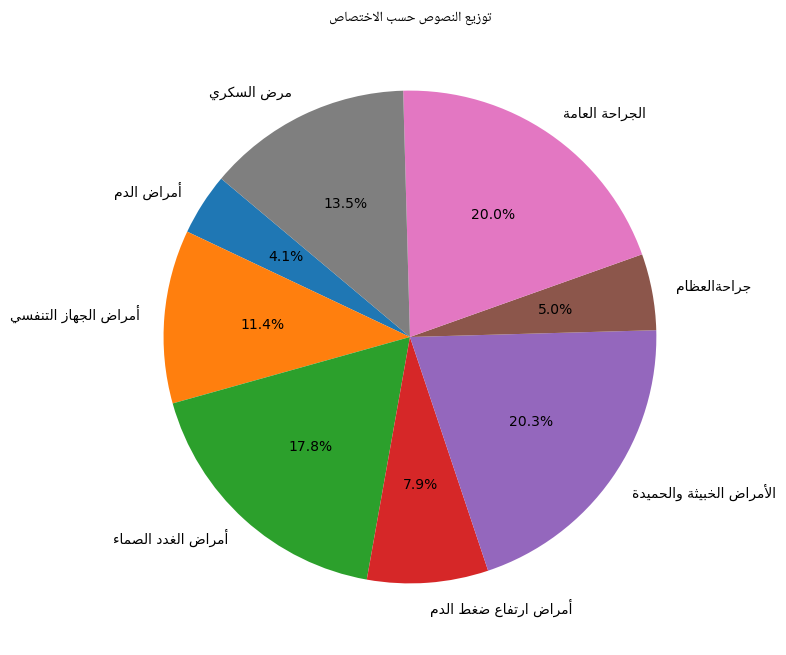

In [24]:
# # Drawing pie chart:
# # ملاحظة بالعربي طلع الخط مفشكل ف تمت الكتابة بالانكليزي



# data = {
#     'الاختصاص': ['أمراض الدم', 'أمراض الجهاز التنفسي', 'أمراض الغدد الصماء','أمراض ارتفاع ضغط الدم','الأمراض الخبيثة والحميدة','جراحةالعظام','الجراحة العامة','مرض السكري'],
#     'عدد النصوص': [2153, 6002, 9417,4190,10711,2641,10548,7096]
# }

# data


# df = pd.DataFrame(data)

# # print(df)
# arabic_font = FontProperties(fname='font/NotoNaskhArabic-VariableFont_wght.ttf') 

# df['الاختصاص'] = [get_display(arabic_reshaper.reshape(label)) for label in df['الاختصاص']]
# plt.figure(figsize=(8, 8))
# plt.pie(df['عدد النصوص'], labels=df['الاختصاص'], autopct='%1.1f%%', startangle=140)
# plt.title(get_display(arabic_reshaper.reshape('توزيع النصوص حسب الاختصاص')), fontproperties=arabic_font)
# plt.show()

# # import pandas as pd
# # import matplotlib.pyplot as plt

# # data = {
# #     'Specialization': ['Blood Diseases', 'Respiratory System Diseases', 'Endocrine Diseases', 'Hypertension', 'Malignant and Benign Diseases', 'Orthopedic Surgery', 'General Surgery', 'Diabetes'],
# #     'Number of Texts': [1398, 3676, 5752, 2537, 6449, 2211, 6307, 4268]
# # }

# # df = pd.DataFrame(data)

# # print(df)

# # plt.figure(figsize=(8, 8))
# # plt.pie(df['Number of Texts'], labels=df['Specialization'], autopct='%1.1f%%', startangle=140)
# # plt.title('Distribution of Texts by Specialization')
# # plt.show()


## [2.2] 

In [25]:
def delete_repeated_letter(text):
    # cleaned_text = re.sub(r'(.)\1{2,}', r'\1', text)
    cleaned_text = re.sub(r'([^\w\s\.])\1+', r'\1', text)
    cleaned_text = re.sub(r'(\.\s*)\1+$', r'\1', cleaned_text)
    return cleaned_text

def handle_connected_words(tokenized):
    # Handle connected words with '-'
    result_tokens = []
    for token in tokenized:
        # Split connected words with '-'
        result_tokens.extend(token.split('-'))
    return result_tokens


def filter_text(list):
    list_of_phrases =[]
    all_tokens = []
    for sentence in list:
        tokenizer = RegexpTokenizer(r'\b\d+\b|\b[^\d\W_]{2,}\b|[^\d\W_]+(?:-[^\d\W_]+)?|\S')
        tokenized = tokenizer.tokenize(delete_repeated_letter(sentence))
        tokenized = handle_connected_words(tokenized)

        # Remove '-' and '/' and one-letter words from each token
        # cleaned_tokens = [token for token in tokenized if len(token) > 1 and token not in ['-', '/']]
        # cleaned_tokens = [token if len(token) > 1 or token == 'و' else '' for token in tokenized if token not in ['-', '/']]

        cleaned_tokens = [token if (token.isalpha() and len(token) > 1) or token == 'و' else '' for token in tokenized if token not in ['-', '/']]

        combined_phrase = ' '.join(cleaned_tokens)
        list_of_phrases.append(combined_phrase)

    for phrase in list_of_phrases:
        tokens = nltk.word_tokenize(phrase)
        all_tokens.append(tokens)
        
    return all_tokens



In [26]:
train_data_answers_list = train_data['answer'].values
answers = filter_text(train_data_answers_list)
flattened_answers = [item for sublist in answers for item in sublist]
print(len(flattened_answers))


1645245


In [27]:
train_data_questions_list = train_data['question'].values
questions = filter_text(train_data_questions_list)
flattened_quesions = [item for sublist in questions for item in sublist]
print(len(flattened_quesions))

801979


In [28]:
# حساب عدد الكلمات الكلي :
total_words_len = len(flattened_quesions) + len(flattened_answers)
print(total_words_len)

2447224


In [29]:
# حساب عدد الكلمات الفريدة :
total_unique_words=len(set(flattened_quesions+flattened_answers))
print("عدد الكلمات الفريدة:", total_unique_words)

عدد الكلمات الفريدة: 94614


## [2.3] 

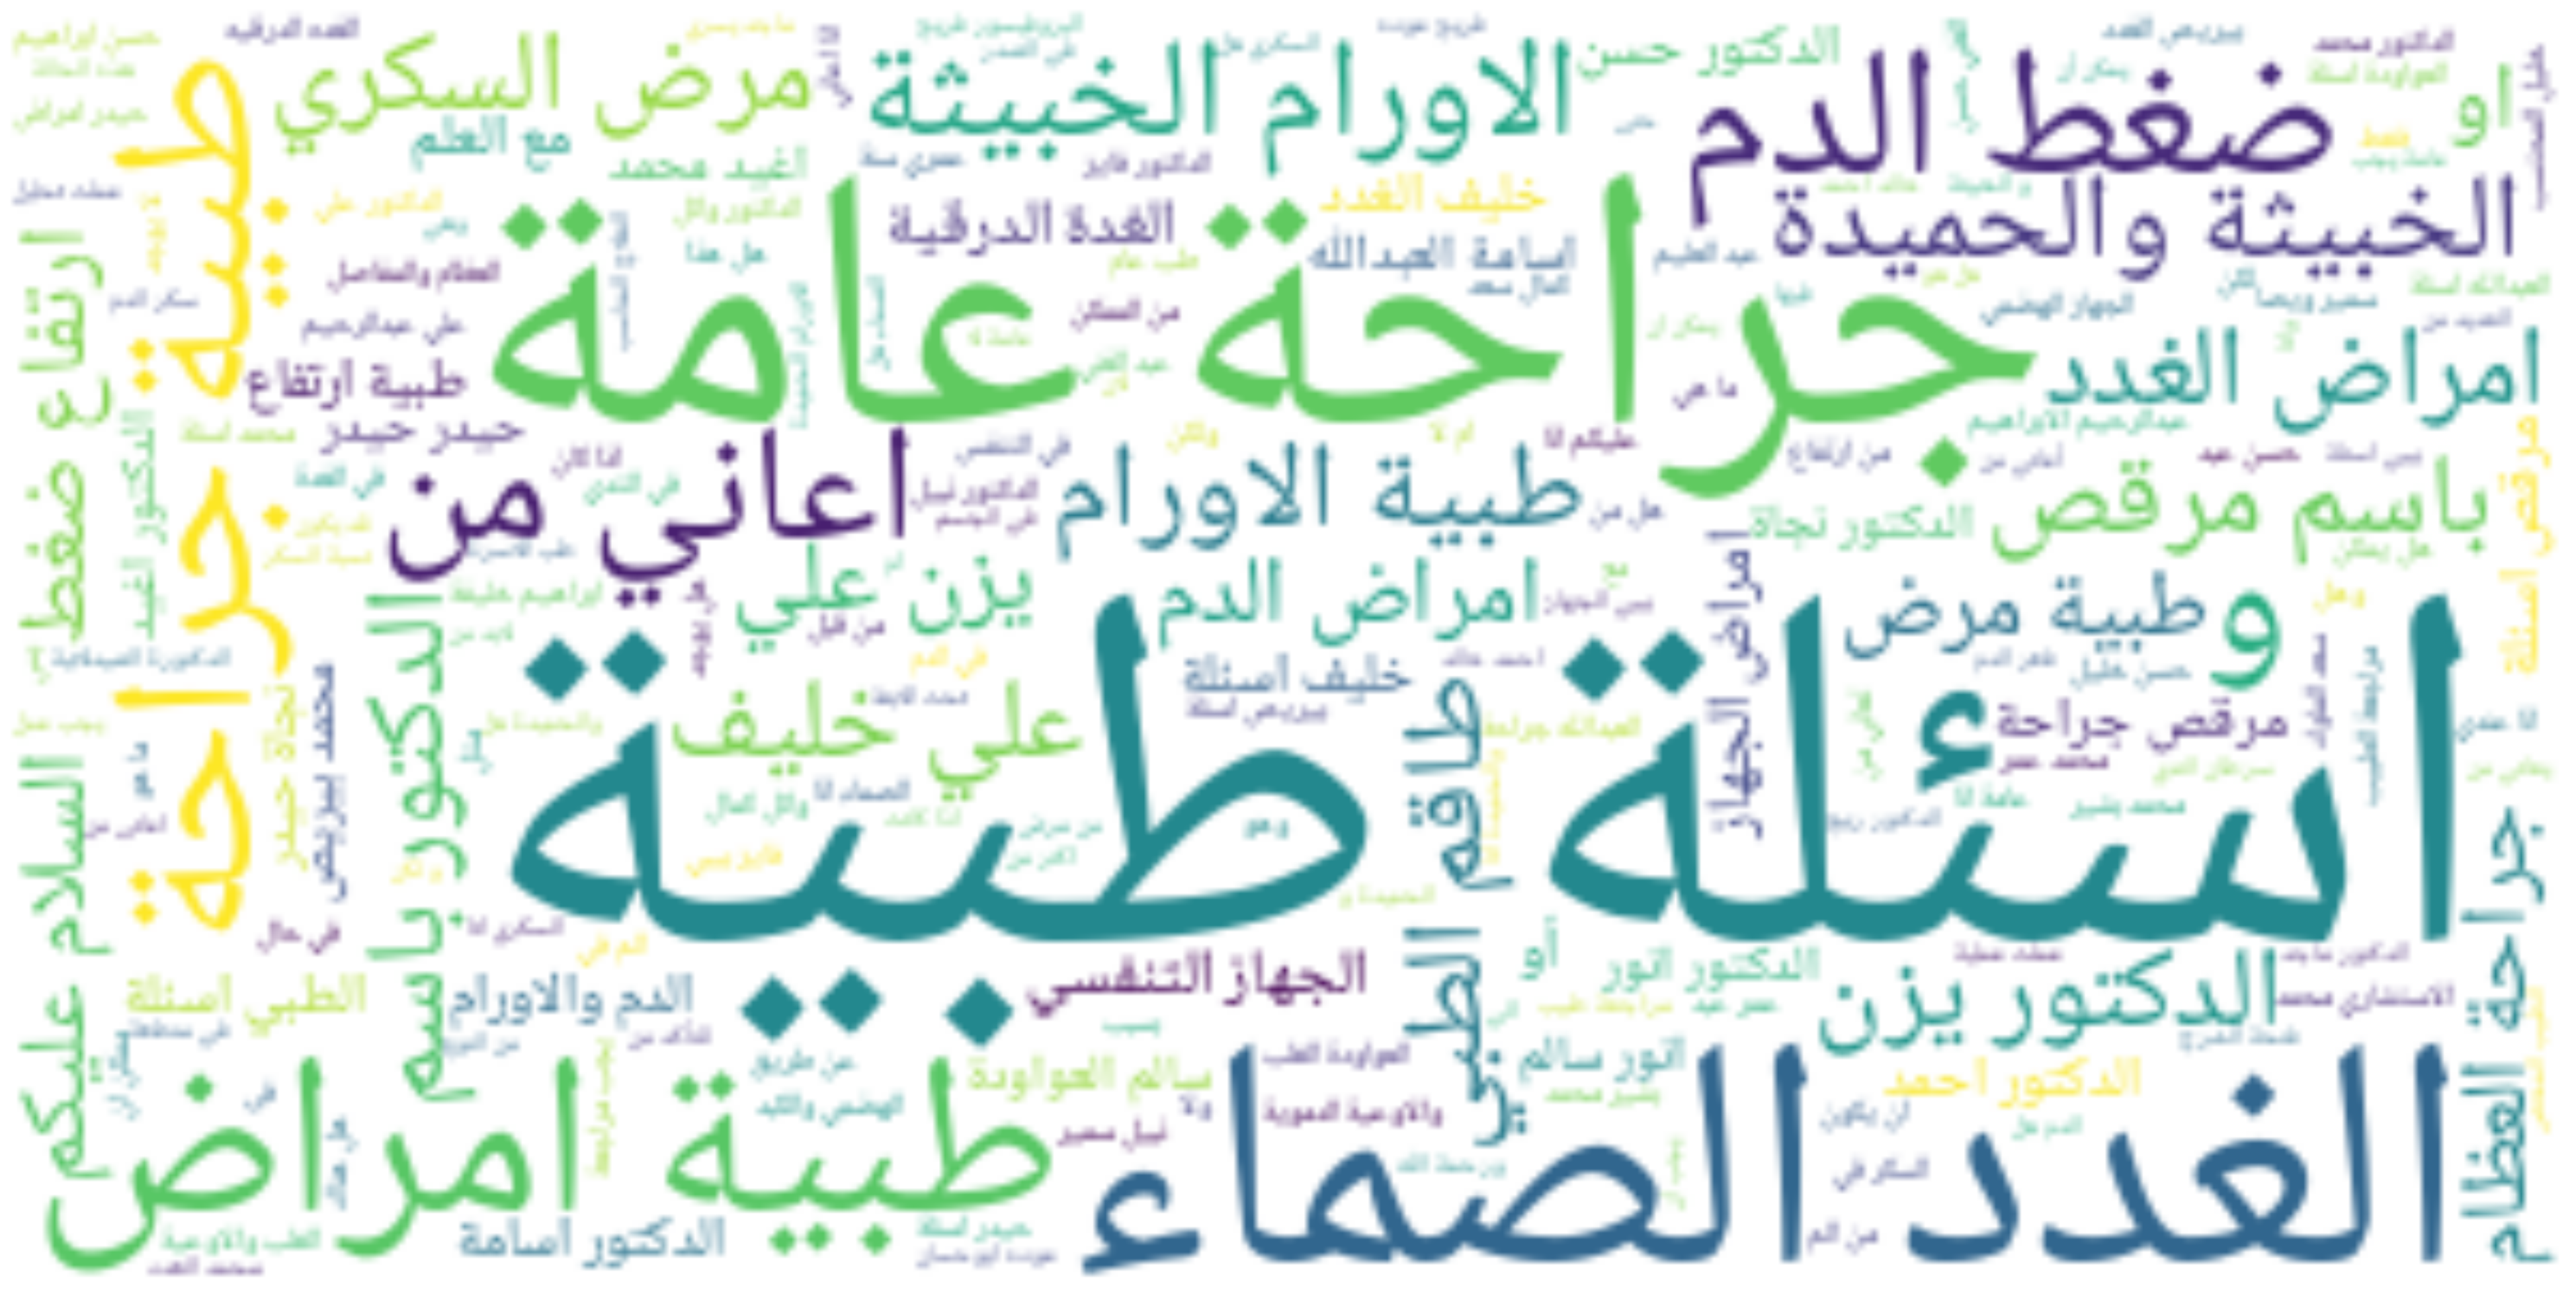

In [30]:
# WCD=dict()
# train_data_answers_list = flattened_answers
# train_data_questions_list = flattened_quesions
# train_data_list=train_data_answers_list+train_data_questions_list
# answers_text = ' '.join(train_data_list)
# reshaped_text = arabic_reshaper.reshape(answers_text)
# arabic_text = get_display(reshaped_text)
# wordcloud = WordCloud(font_path='font/NotoNaskhArabic-VariableFont_wght.ttf', background_color='white').generate(arabic_text)
# WCD=wordcloud.words_
# plt.figure(figsize=(50, 50))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

## [2.4] 

In [31]:
def tokenized_text(text):
    # allWords = nltk.tokenize.word_tokenize(text)

    allWordDist = nltk.FreqDist(w for w in text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in text if w not in stopwords)  
    mostCommon= allWordDist.most_common(15)
    print('أكثر 15 كلمة مكررة:',mostCommon)
    leastCommon = allWordDist.most_common()[:-11:-1]
    print('أقل 10 كلمة مكررة:', leastCommon)
    bigram_freq = nltk.FreqDist(bigrams(text))
    most_common_bigrams = bigram_freq.most_common(10)
    print('أكثر 10 ثنائيات مكررة في النص:',most_common_bigrams)
    trigram_freq = nltk.FreqDist(trigrams(text))
    most_common_trigrams = trigram_freq.most_common(10)
    print('أكثر 10 ثلاثيات كلمات مكررة في النص:',most_common_trigrams)
    collocations_bigram = nltk.collocations.BigramCollocationFinder.from_words(text)
    most_common_collocations_bigram = collocations_bigram.nbest(nltk.collocations.BigramAssocMeasures.likelihood_ratio, 10)
    print('أكثر 10 ثنائيات كلمات مهمة في النص:',most_common_collocations_bigram)
    collocations_trigram = nltk.collocations.TrigramCollocationFinder.from_words(text)
    most_common_collocations_trigram = collocations_trigram.nbest(nltk.collocations.TrigramAssocMeasures.likelihood_ratio, 10)
    print('أكثر 10 ثلاثيات كلمات مهمة في النص:',most_common_collocations_trigram)  
    print('========================================================================================================================================================================================')  


    


# tokenized_text('tony botros is tony the tony best best best tony botros in in in the whole world tony botros')
# tokenized_text(['طوني','طوني','بطرس','هو','طوني','هو','بطرس','ال','الأفضل'])
# tokenized_text(['لدي', 'جرح', 'فوق', 'حاجبي', 'و', 'تمت', 'عملية', 'الخياطة', 'ثم', 'نزع', 'الغرزات', 'بشكل', 'عادي', 'لكن', 'مر', 'اسبوع', 'على', 'ذلك', 'و', 'مازال', 'هناك', 'الم', 'و', 'تطلب', 'شديد', 'في', 'المنطقة', 'لدرجة', 'اني', 'لا', 'استطيع', 'رفع', 'حاجبي', 'ابدا', 'إضافة', 'لوجود', 'انتفاخ', 'هل', 'هدا', 'طبيعي', 'ام', 'يمكن', 'ان', 'يكون', 'خلل', 'و', 'إن', 'كان', 'كذلك', 'ما', 'هو'])
tokenized_text(answers[0])

أكثر 15 كلمة مكررة: [('المريض', 2), ('قد', 2), ('يناسب', 2), ('الدكتور', 2), ('يزن', 2), ('علي', 2), ('خليف', 2), ('و', 2), ('لكل', 1), ('علاج', 1), ('ايجابيته', 1), ('وسلبياته', 1), ('والتي', 1), ('تعتمد', 1), ('على', 1)]
أقل 10 كلمة مكررة: [('الصماء', 1), ('الغدد', 1), ('الانسولين', 1), ('ايضا', 1), ('جلوكوفانس', 1), ('الدواء', 1), ('عيوب', 1), ('مميزات', 1), ('هي', 1), ('ما', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('الدكتور', 'يزن'), 2), (('يزن', 'علي'), 2), (('علي', 'خليف'), 2), (('لكل', 'علاج'), 1), (('علاج', 'ايجابيته'), 1), (('ايجابيته', 'وسلبياته'), 1), (('وسلبياته', 'والتي'), 1), (('والتي', 'تعتمد'), 1), (('تعتمد', 'على'), 1), (('على', 'حالة'), 1)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('الدكتور', 'يزن', 'علي'), 2), (('يزن', 'علي', 'خليف'), 2), (('لكل', 'علاج', 'ايجابيته'), 1), (('علاج', 'ايجابيته', 'وسلبياته'), 1), (('ايجابيته', 'وسلبياته', 'والتي'), 1), (('وسلبياته', 'والتي', 'تعتمد'), 1), (('والتي', 'تعتمد', 'على'), 1), (('تعتمد', 'على', 'حالة'), 1), (('على', 'حالة', 'المريض

In [32]:
#الشرح

In [33]:
# هاد التابع لمرق كل اختصاص وجيب منو الكلمات كلا متل مو مطلوب ب 2.4
def all_tokinized_text(specialized):
    filtered_questions = filter_text(train_data[train_data['label']==specialized]['question'].values)
    filtered_answers = filter_text(train_data[train_data['label']==specialized]['answer'].values)
    list = filtered_questions + filtered_answers
    flattened_list = [item for sublist in list for item in sublist]
    # flattened_list
    tokenized_text(flattened_list)
    

In [34]:
# all_tokinized_text('أمراض الدم')

أكثر 15 كلمة مكررة: [('الدم', 3463), ('من', 2759), ('في', 2638), ('الدكتور', 1700), ('طبية', 1419), ('اسئلة', 1398), ('امراض', 1385), ('و', 1223), ('على', 924), ('هل', 883), ('ما', 664), ('ان', 631), ('لا', 605), ('عن', 524), ('أو', 511)]
أقل 10 كلمة مكررة: [('يستجعي', 1), ('رقمهم', 1), ('تستطيعين', 1), ('معهم', 1), ('بالتكلم', 1), ('متوافر', 1), ('ويقدم', 1), ('والمخاطر', 1), ('والاداء', 1), ('والكوادر', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 1398), (('امراض', 'الدم'), 1191), (('طبية', 'امراض'), 1153), (('الدكتور', 'فايز'), 474), (('فايز', 'بيبي'), 474), (('طاقم', 'الطبي'), 430), (('فقر', 'الدم'), 330), (('الجهاز', 'الهضمي'), 289), (('الهضمي', 'والكبد'), 267), (('في', 'الدم'), 247)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'امراض'), 1153), (('طبية', 'امراض', 'الدم'), 1044), (('الدكتور', 'فايز', 'بيبي'), 474), (('الجهاز', 'الهضمي', 'والكبد'), 267), (('فايز', 'بيبي', 'اسئلة'), 237), (('بيبي', 'اسئلة', 'طبية'), 237), (('فايز', 'بيبي', 'الجهاز'), 237), (('

In [35]:
# all_tokinized_text('أمراض الجهاز التنفسي')

أكثر 15 كلمة مكررة: [('من', 7277), ('في', 6403), ('الدكتور', 4434), ('و', 3914), ('طبية', 3704), ('اسئلة', 3683), ('الجهاز', 3329), ('امراض', 3280), ('التنفسي', 2963), ('على', 2001), ('التنفس', 1785), ('مع', 1778), ('هل', 1733), ('صدرية', 1485), ('ان', 1377)]
أقل 10 كلمة مكررة: [('واعطس', 1), ('يستغني', 1), ('والدرجة', 1), ('cure', 1), ('الأجنبية', 1), ('بعدمح', 1), ('سريرى', 1), ('Eye', 1), ('eye', 1), ('بالغذاء', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 3676), (('طبية', 'امراض'), 2985), (('الجهاز', 'التنفسي'), 2899), (('امراض', 'الجهاز'), 2758), (('اعاني', 'من'), 1099), (('طاقم', 'الطبي'), 722), (('الدكتور', 'فايز'), 654), (('فايز', 'بيبي'), 652), (('في', 'التنفس'), 650), (('السلام', 'عليكم'), 548)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'امراض'), 2985), (('امراض', 'الجهاز', 'التنفسي'), 2755), (('طبية', 'امراض', 'الجهاز'), 2741), (('الدكتور', 'فايز', 'بيبي'), 651), (('طاقم', 'الطبي', 'اسئلة'), 361), (('الطبي', 'اسئلة', 'طبية'), 361), (('الجهاز', 'التن

In [36]:
# all_tokinized_text('أمراض الغدد الصماء')

أكثر 15 كلمة مكررة: [('الدكتور', 8336), ('من', 8222), ('في', 7842), ('الغدد', 7332), ('الصماء', 6838), ('طبية', 5803), ('اسئلة', 5754), ('امراض', 4901), ('و', 4805), ('الغدة', 4208), ('هل', 3986), ('الدرقية', 3123), ('على', 3044), ('علي', 2949), ('محمد', 2629)]
أقل 10 كلمة مكررة: [('الولادةو', 1), ('فالعيش', 1), ('العده', 1), ('والكرياتين', 1), ('بانتضام', 1), ('tSH', 1), ('عمرهاتعاني', 1), ('والتضخم', 1), ('بوزنها', 1), ('تضرها', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('الغدد', 'الصماء'), 6825), (('اسئلة', 'طبية'), 5752), (('طبية', 'امراض'), 4561), (('امراض', 'الغدد'), 4275), (('الغدة', 'الدرقية'), 2448), (('الدكتور', 'يزن'), 1992), (('يزن', 'علي'), 1992), (('علي', 'خليف'), 1992), (('الدكتور', 'باسم'), 1496), (('باسم', 'مرقص'), 1496)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'امراض'), 4561), (('امراض', 'الغدد', 'الصماء'), 4269), (('طبية', 'امراض', 'الغدد'), 4264), (('الدكتور', 'يزن', 'علي'), 1992), (('يزن', 'علي', 'خليف'), 1992), (('الدكتور', 'باسم', 'مرقص'), 1496), (('ا

In [37]:
# all_tokinized_text('ارتفاع ضغط الدم')

أكثر 15 كلمة مكررة: [('الدم', 5226), ('ضغط', 4867), ('من', 4757), ('في', 3732), ('الدكتور', 3729), ('ارتفاع', 3485), ('طبية', 2578), ('اسئلة', 2537), ('الضغط', 2421), ('على', 1897), ('و', 1880), ('القلب', 1625), ('هل', 1622), ('سالم', 1514), ('انور', 1481)]
أقل 10 كلمة مكررة: [('بالبيت', 1), ('التواجد', 1), ('تقسيمه', 1), ('للنشاط', 1), ('أنجح', 1), ('لمشاكل', 1), ('مضاعفه', 1), ('التحسن', 1), ('كثب', 1), ('والمراقبه', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('ضغط', 'الدم'), 4312), (('ارتفاع', 'ضغط'), 2758), (('اسئلة', 'طبية'), 2537), (('طبية', 'ارتفاع'), 1894), (('انور', 'سالم'), 1481), (('الدكتور', 'انور'), 1480), (('سالم', 'العواودة'), 1480), (('القلب', 'والاوعية'), 1204), (('والاوعية', 'الدموية'), 1204), (('العواودة', 'اسئلة'), 740)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('ارتفاع', 'ضغط', 'الدم'), 2698), (('اسئلة', 'طبية', 'ارتفاع'), 1894), (('طبية', 'ارتفاع', 'ضغط'), 1894), (('الدكتور', 'انور', 'سالم'), 1480), (('انور', 'سالم', 'العواودة'), 1480), (('القلب', 'والاوعية', 'الدموية'), 

In [38]:
# all_tokinized_text('الأورام الخبيثة والحميدة')

أكثر 15 كلمة مكررة: [('الدكتور', 9848), ('من', 9634), ('في', 9528), ('طبية', 6479), ('اسئلة', 6451), ('الاورام', 5405), ('الخبيثة', 5224), ('و', 4940), ('والحميدة', 4718), ('هل', 4330), ('الدم', 3706), ('حيدر', 3328), ('على', 3106), ('امراض', 3071), ('الثدي', 2983)]
أقل 10 كلمة مكررة: [('قسوى', 1), ('نحاول', 1), ('إجبار', 1), ('إتباعه', 1), ('لضمان', 1), ('واستصئال', 1), ('واثبتت', 1), ('NA', 1), ('CREATININE', 1), ('ACID', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 6449), (('الاورام', 'الخبيثة'), 4730), (('الخبيثة', 'والحميدة'), 4717), (('طبية', 'الاورام'), 4716), (('باسم', 'مرقص'), 2584), (('الدكتور', 'باسم'), 2578), (('امراض', 'الدم'), 2327), (('الدم', 'والاورام'), 2230), (('جراحة', 'عامة'), 2187), (('الدكتور', 'نجاة'), 1658)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'الاورام'), 4716), (('طبية', 'الاورام', 'الخبيثة'), 4716), (('الاورام', 'الخبيثة', 'والحميدة'), 4716), (('الدكتور', 'باسم', 'مرقص'), 2578), (('امراض', 'الدم', 'والاورام'), 2230), (('الدكتور'

In [39]:
# all_tokinized_text('جراحة العظام')

أكثر 15 كلمة مكررة: [('جراحة', 3569), ('العظام', 3474), ('في', 3465), ('من', 3432), ('الدكتور', 2790), ('طبية', 2237), ('اسئلة', 2212), ('و', 1733), ('والمفاصل', 1495), ('هل', 1122), ('على', 1108), ('انا', 877), ('مع', 724), ('لا', 722), ('الم', 673)]
أقل 10 كلمة مكررة: [('فيستحسن', 1), ('ومسكنة', 1), ('خصائص', 1), ('للتقليل', 1), ('والساخنة', 1), ('والمتعبة', 1), ('والحد', 1), ('فإنها', 1), ('للنتوءات', 1), ('ومخاطر', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('جراحة', 'العظام'), 3290), (('اسئلة', 'طبية'), 2211), (('طبية', 'جراحة'), 1894), (('العظام', 'والمفاصل'), 1378), (('البروفيسور', 'فريح'), 598), (('فريح', 'عوده'), 598), (('عوده', 'ابوحسان'), 598), (('طاقم', 'الطبي'), 540), (('الدكتور', 'احمد'), 510), (('اعاني', 'من'), 474)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'جراحة'), 1894), (('طبية', 'جراحة', 'العظام'), 1816), (('جراحة', 'العظام', 'والمفاصل'), 1374), (('البروفيسور', 'فريح', 'عوده'), 598), (('فريح', 'عوده', 'ابوحسان'), 598), (('الدكتور', 'احمد', 'اسامة'), 418), 

In [40]:
# all_tokinized_text('جراحة عامة')

أكثر 15 كلمة مكررة: [('من', 10187), ('جراحة', 9695), ('عامة', 9026), ('الدكتور', 8290), ('في', 8193), ('طبية', 6340), ('اسئلة', 6312), ('و', 5355), ('هل', 3324), ('على', 2957), ('لا', 2494), ('مع', 2447), ('بعد', 2439), ('او', 2383), ('انا', 2235)]
أقل 10 كلمة مكررة: [('بافراازات', 1), ('لوتتسبب', 1), ('تجاهلها', 1), ('رؤيته', 1), ('بلاذما', 1), ('اشهرالجرح', 1), ('وصبغة', 1), ('ورايت', 1), ('تاما', 1), ('اختلافا', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('جراحة', 'عامة'), 9002), (('اسئلة', 'طبية'), 6307), (('طبية', 'جراحة'), 4841), (('الدكتور', 'اسامة'), 1628), (('اسامة', 'العبدالله'), 1614), (('اعاني', 'من'), 1325), (('السلام', 'عليكم'), 923), (('العبدالله', 'اسئلة'), 807), (('العبدالله', 'جراحة'), 807), (('الدكتور', 'حسن'), 766)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'جراحة'), 4841), (('طبية', 'جراحة', 'عامة'), 4684), (('الدكتور', 'اسامة', 'العبدالله'), 1614), (('اسامة', 'العبدالله', 'اسئلة'), 807), (('العبدالله', 'اسئلة', 'طبية'), 807), (('اسامة', 'العبدالله', 'جراح

In [41]:
# all_tokinized_text('مرض السكري')

أكثر 15 كلمة مكررة: [('من', 7463), ('السكري', 6297), ('في', 5747), ('الدكتور', 5524), ('السكر', 4984), ('مرض', 4595), ('طبية', 4296), ('اسئلة', 4271), ('و', 3465), ('علي', 2922), ('هل', 2845), ('على', 2770), ('يزن', 2314), ('خليف', 2294), ('الدم', 2215)]
أقل 10 كلمة مكررة: [('نلجا', 1), ('قراءاته', 1), ('فحصين', 1), ('إجراءه', 1), ('حرارى', 1), ('المتوسطة', 1), ('ممن', 1), ('يستحب', 1), ('الأياف', 1), ('مثله', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 4268), (('مرض', 'السكري'), 3955), (('طبية', 'مرض'), 3225), (('الدكتور', 'يزن'), 2296), (('يزن', 'علي'), 2294), (('علي', 'خليف'), 2294), (('الغدد', 'الصماء'), 1951), (('خليف', 'اسئلة'), 1147), (('خليف', 'الغدد'), 1147), (('طاقم', 'الطبي'), 846)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'مرض'), 3225), (('طبية', 'مرض', 'السكري'), 3225), (('الدكتور', 'يزن', 'علي'), 2294), (('يزن', 'علي', 'خليف'), 2294), (('علي', 'خليف', 'اسئلة'), 1147), (('خليف', 'اسئلة', 'طبية'), 1147), (('علي', 'خليف', 'الغدد'), 1147), (('خليف'

In [42]:
# # على كل الداتا تبع الترين:
# filtered_questions = filter_text(train_data['question'].values)
# filtered_answers = filter_text(train_data['answer'].values)
# list = filtered_questions + filtered_answers
# flattened_list = [item for sublist in list for item in sublist]
# # flattened_list
# tokenized_text(flattened_list)


أكثر 15 كلمة مكررة: [('من', 53731), ('في', 47548), ('الدكتور', 44651), ('طبية', 32856), ('اسئلة', 32618), ('و', 27315), ('جراحة', 20023), ('هل', 19845), ('الدم', 18946), ('على', 17807), ('امراض', 14809), ('عامة', 14630), ('لا', 13177), ('الغدد', 12601), ('مع', 12048)]
أقل 10 كلمة مكررة: [('قسوى', 1), ('إجبار', 1), ('إتباعه', 1), ('ومسكنة', 1), ('والمتعبة', 1), ('للنتوءات', 1), ('خياراتها', 1), ('Spurs', 1), ('بافراازات', 1), ('لوتتسبب', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 32598), (('جراحة', 'عامة'), 14448), (('الغدد', 'الصماء'), 11130), (('طبية', 'امراض'), 10883), (('طبية', 'جراحة'), 8607), (('ضغط', 'الدم'), 6735), (('اعاني', 'من'), 6247), (('الاورام', 'الخبيثة'), 6106), (('الخبيثة', 'والحميدة'), 6091), (('طبية', 'الاورام'), 6089)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'امراض'), 10883), (('اسئلة', 'طبية', 'جراحة'), 8607), (('اسئلة', 'طبية', 'الاورام'), 6089), (('طبية', 'الاورام', 'الخبيثة'), 6089), (('الاورام', 'الخبيثة', 'والحميدة'), 6089), (('طب

In [43]:
#الشرح

## [2.5] 

In [44]:
train_data['all_word']=train_data['answer']+train_data['question']
train_data_list=train_data['all_word'].values
all_word = filter_text(train_data_list)

In [45]:
flattened_all_word = [item for sublist in all_word for item in sublist]
train_data['length_of_sentinse']=train_data['all_word'].apply(len)
# train_data['length_of_sentinse']

In [46]:
w=[]
for i in all_word:
    w.append(set(i))
train_data['unique_words']=w
train_data['number_of_unique_words']=train_data['unique_words'].apply(len)

In [47]:
def histogram(length_of_sentinse,number_of_unique_words):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    # plt.bar(number_of_unique_words, length_of_sentinse, color='blue', alpha=0.7)
    plt.hist(length_of_sentinse, label='length_of_sentinse',edgecolor='black', linewidth=1.2,bins=30, alpha=0.5)
    plt.hist(number_of_unique_words, label='number_of_unique_words',edgecolor='black', linewidth=1.2,bins=30, alpha=0.5)
    plt.title('histogram')
    plt.xlabel('length_of_sentinse')
    plt.ylabel('number_of_unique_words')
    # plt.tight_layout()
    plt.legend()
    plt.show()

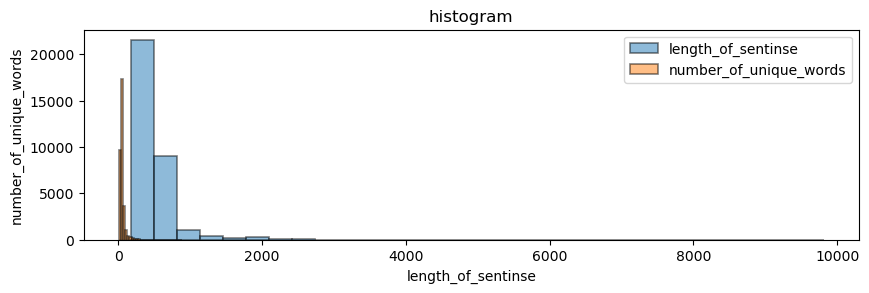

In [48]:
# لكل النص
# histogram(train_data['length_of_sentinse'],train_data['number_of_unique_words'])

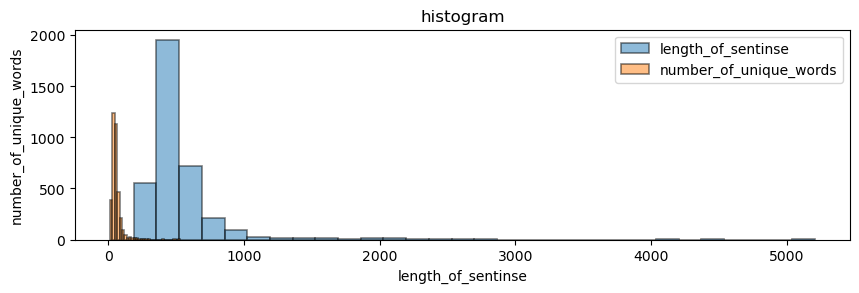

In [49]:
# # أمراض الجهاز التنفسي
# histogram(train_data[train_data['label']=='أمراض الجهاز التنفسي']['length_of_sentinse'],train_data[train_data['label']=='أمراض الجهاز التنفسي']['number_of_unique_words'])

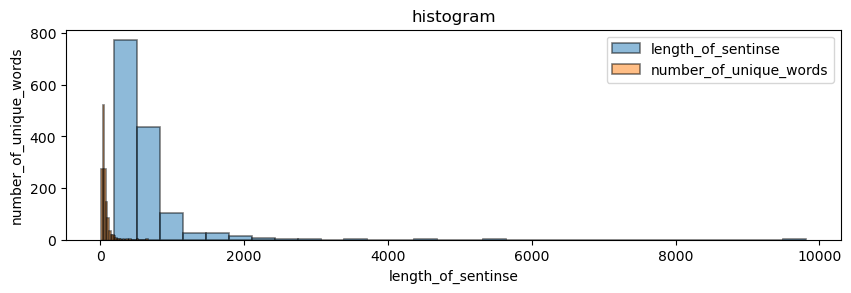

In [50]:
# # أمراض الدم
# histogram(train_data[train_data['label']=='أمراض الدم']['length_of_sentinse'],train_data[train_data['label']=='أمراض الدم']['number_of_unique_words'])

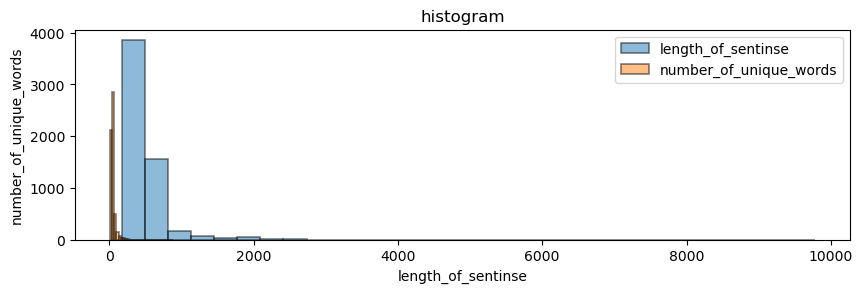

In [51]:
# # أمراض الغدد الصماء
# histogram(train_data[train_data['label']=='أمراض الغدد الصماء']['length_of_sentinse'],train_data[train_data['label']=='أمراض الغدد الصماء']['number_of_unique_words'])

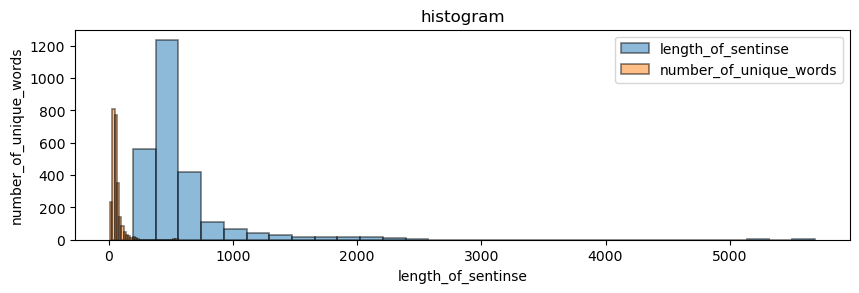

In [52]:
# # ارتفاع ضغط الدم
# histogram(train_data[train_data['label']=='ارتفاع ضغط الدم']['length_of_sentinse'],train_data[train_data['label']=='ارتفاع ضغط الدم']['number_of_unique_words'])

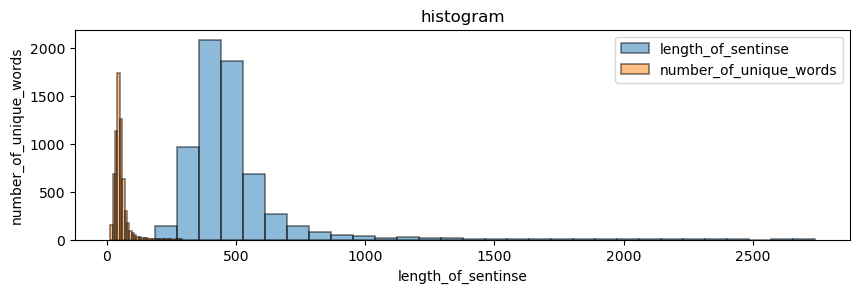

In [53]:
# # الأورام الخبيثة والحميدة
# histogram(train_data[train_data['label']=='الأورام الخبيثة والحميدة']['length_of_sentinse'],train_data[train_data['label']=='الأورام الخبيثة والحميدة']['number_of_unique_words'])

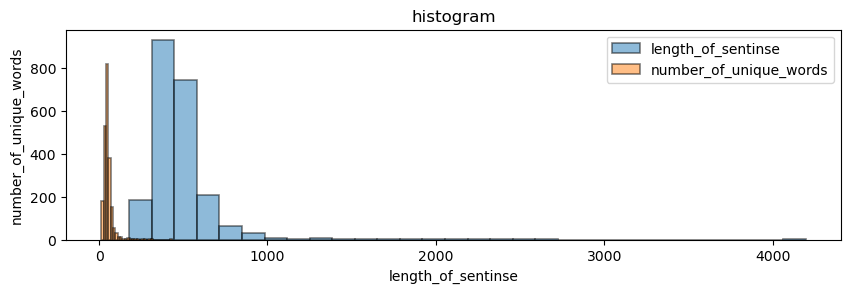

In [54]:
# # جراحة العظام
# histogram(train_data[train_data['label']=='جراحة العظام']['length_of_sentinse'],train_data[train_data['label']=='جراحة العظام']['number_of_unique_words'])

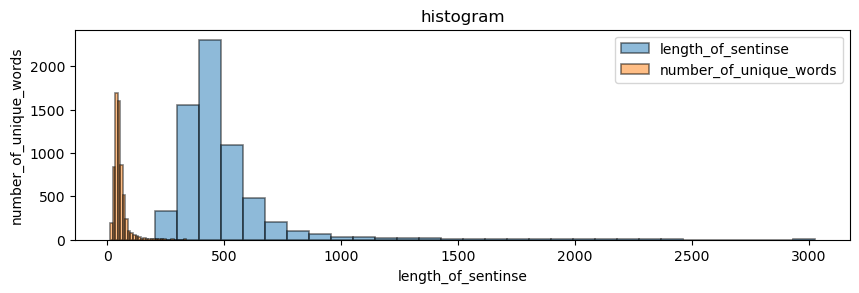

In [55]:
# # جراحة عامة
# histogram(train_data[train_data['label']=='جراحة عامة']['length_of_sentinse'],train_data[train_data['label']=='جراحة عامة']['number_of_unique_words'])

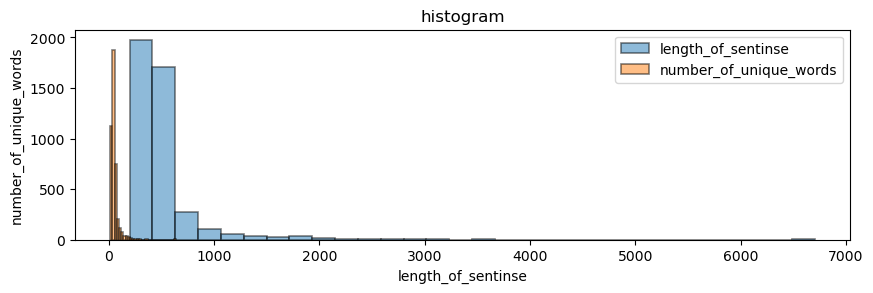

In [56]:
# # مرض السكري
# histogram(train_data[train_data['label']=='مرض السكري']['length_of_sentinse'],train_data[train_data['label']=='مرض السكري']['number_of_unique_words'])

# Question [3]: Text Cleaning and Normalization

## [3.1] 


In [57]:
# train_data
# clean_tweet = re.sub(r'^RT(\s)+|https?\S+|#|@\S+', '', tweet) ## من أجل أزالت 
#r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
def remove_links(text):
    clean_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    return clean_text


In [58]:
# remove_links('https://chat.openai.com/c/dc21a08a-5be6-42e3-a6e4-0c1d26791a46 hi')

## [3.2] 

In [59]:
import re

def remove_doctors_prefix(text):
    pattern = r'\b(?:الدكتور(?:ة)?)\s+(?:الصيدلاني(?:ة)?)?\s*(?:([\u0600-\u06FF]+)\s*[\u0600-\u06FF]+\s*([\u0600-\u06FF]+))\b'

    def replacer(match):
        full_name = match.group(1)
        first_name = full_name.split()[0]
        return f'د.{first_name}'

    result = re.sub(pattern, replacer, text)

    return result


In [60]:
texts = train_data[train_data['label']=='أمراض الدم']['answer']
# texts.apply(remove_doctors_prefix)[0]
# for text in texts[:5]:
#     # print(text)
#     print(remove_doctors_prefix(text))
#     print("=================================================================")



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


د.يزن







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

د.يزن 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل 3 شهور (تصل الى 6 شهور اذا كانت التحاليل جيدة) سكر تراكمى كل 3 شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر 3 شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 6 شهور لمتابعة حالة الشبكية و 

## [3.3] 

In [145]:
def remove_sentences_after_doctor(text):
    result = re.sub(r'(الدكتور[^\n]*\n|د\.[^\n]*\n)([^\n]*\n){0,6}', r'\1', text)
    return result

# for text in texts[:5]:
#     print(remove_sentences_after_doctor(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0
2023-06-17 05:56:49


الدكتور حسن ابراهيم خليفة

/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059

الدكتور حسن ابراهيم خليفة 



لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح
1
2018-03-13 08:07:00


الدكتور اسامة العبدالله

/اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406

الدكتور اسامة العبدالله 



اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0
2022-08-13 10:24:38


د. سوزان الحسنين

/اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184

د. سوزان الحسنين 



بعد تمام البلوغ لايحدث نمو فى الطول
1
2015-08-29 20:56:25


الدكتور احمد اسامة عبدالغنى صقر

/اسئلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قصيرة-القامة-من-الطول-سم-هل-525552

الدكتور احمد اسامة عبدالغنى صقر 



ليس بالخطير لكن ي

## [3.4] 

In [62]:
def remove_duplicate_letters_except_alif(text):
    pattern = re.compile(r'(?:(?<!ا)ا(?!ا)|(.)(?:\1)+)', re.UNICODE) # بشلي كلشي أحرف مكررة وخاصة الألف مابكررها اكتر من مرة
    result = pattern.sub(lambda x: x.group(1) if x.group(1) else 'ا', text)
    return result

# for text in texts[:5]:
#     print(remove_duplicate_letters_except_alif(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-ميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-35157

الدكتور يزن علي خليف 


الغد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل 3 شهور (تصل الى 6 شهور اذا كانت التحاليل جيدة) سكر تراكمى كل 3 شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر 3 شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 6 شه

## [3.5]

### [3.5.1] 

In [63]:
# هاد بيقلب لل 1و2و3و4و....
def convert_numbers_to_arabic_v2(text):
    digit_mapping = {'٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4', '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'}
    english_text = re.sub(r'[٠-٩]', lambda x: digit_mapping[x.group()], text)

    return english_text


# for text in texts[:5]:
#     print(convert_numbers_to_arabic_v2(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل 3 شهور (تصل الى 6 شهور اذا كانت التحاليل جيدة) سكر تراكمى كل 3 شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر 3 شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 

In [64]:
# هاد بيلقلب لل ١,٢,٣,٤
def convert_numbers_to_arabic(text):
    digit_mapping = {'0': '٠', '1': '١', '2': '٢', '3': '٣', '4': '٤', '5': '٥', '6': '٦', '7': '٧', '8': '٨', '9': '٩'}
    arabic_text = re.sub(r'[0-9]', lambda x: digit_mapping[x.group()], text)

    return arabic_text


# for text in texts[:5]:
#     print(convert_numbers_to_arabic(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
١
٢٠١٥-٠١-٠٤ ٢٠:٠٨:٥١


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-٣٥١١٥٧

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
٠
٢٠١٨-٠٨-٢٤ ٢٣:١٩:٤٩


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-١٢١٦٧٩٥

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل ٣ شهور (تصل الى ٦ شهور اذا كانت التحاليل جيدة) سكر تراكمى كل ٣ شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر ٣ شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 

### [3.5.2] 

In [65]:
def standardize_numbers(text, replacement_symbol='T'):
    digit_pattern = r'[0-9٠-٩]+'
    standardized_text = re.sub(digit_pattern, lambda x: replacement_symbol, text)

    return standardized_text


# for text in texts[:5]:
#     print(standardize_numbers(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
T
T-T-T T:T:T


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-T

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
T
T-T-T T:T:T


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-T

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل T شهور (تصل الى T شهور اذا كانت التحاليل جيدة) سكر تراكمى كل T شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر T شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل T شهور لمتابعة حالة الشبكية

### [3.5.3] 

In [66]:
def remove_numbers(text):
    digit_pattern = r'\d+'
    
    text_without_numbers = re.sub(digit_pattern, '', text)

    return text_without_numbers

# for text in texts[:5]:
#     print(remove_numbers(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له

-- ::


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص

-- ::


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل  شهور (تصل الى  شهور اذا كانت التحاليل جيدة) سكر تراكمى كل  شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر  شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل  شهور لمتابعة حالة الشبكية و العين عموما.
يضاف 

### [3.5.4]

In [67]:
texts = train_data[train_data['label']=='أمراض الجهاز التنفسي']['answer'].values

def remove_dates_and_times(text):
    date_time_patterns = [
        r'\d{4}-\d{2}-\d{2}\s+\d{1,2}:\d{2}:\d{2}'  # Match dates and times like 2015-01-04 20:08:51
        # r'\d{1,2}/\d{1,2}/\d{2,4}',         # Match dates like 12/31/2022
        # r'\d{1,2}-\d{1,2}-\d{2,4}',         # Match dates like 12-31-2022
        # r'\d{1,2}:\d{2}:\d{2}'               # Match times like 12:34:56
        # r'\d{1,2}\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s*\d{2,4}',  # Match dates like 31 Dec 2022
        # r'\d{1,2}:\d{2}\s*(?:AM|PM|am|pm)?',  # Match times like 12:34 AM
    ]

    for pattern in date_time_patterns:
        text = re.sub(pattern, '', text)

    return text

# for text in texts[:5]:
#     print(remove_dates_and_times(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0



الدكتور حسن ابراهيم خليفة







/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059

الدكتور حسن ابراهيم خليفة 


جراحة عامة 





لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح
1



الدكتور اسامة العبدالله







/اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406

الدكتور اسامة العبدالله 


جراحة عامة 





اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0



د. سوزان الحسنين







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184

د. سوزان الحسنين 


الاورام الحميدة و الخبيثة 





بعد تمام البلوغ لايحدث نمو فى الطول
1



الدكتور احمد اسامة عبدالغنى صقر







/اسئلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قصيرة-القامة-من-الطول-سم-هل-525552

الدكتور احمد اسامة عبدالغنى صقر 


جراحة ا

## [3.6] 

### [3.6.1] 

In [68]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
def remove_punctuation(text):
    text=re.sub(r'[!\"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~،؛؟ـ]',' ',text)
    return text

# for text in texts[:5]:
#     print(remove_punctuation(text))

### [3.6.2] 

In [71]:
def keep_arabic_punctuations_numbers(text):
    text= re.sub(r'[^\u0600-\u06FF0-9،؛؟ـ!\"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~]', ' ', text)
    return text

# for text in texts[:5]:
#     print(keep_arabic_punctuations_numbers(text))

## [3.7] 

## [3.8] 

In [73]:
ar_stemmer=stemmer("arabic")
ar_stemmer.stemWord(u"فسميتموها")

'سمي'

In [74]:
def stem_arabic_words_farasa(text):
    stemmer = FarasaStemmer()
    text=stemmer.stem(text)
    return text

text = "الكتب في المكتبة متنوعة ومفيدة"
stemmed_text = stem_arabic_words_farasa(text)
print(stemmed_text)

كتاب في مكتبة متنوع مفيد


In [75]:
# def stem_arabic_words_tashaphyne(text):
#     stemmer = ArabicLightStemmer()
#     words = text.split()
#     stemmed_words = [stemmer.light_stem(word) for word in words]
#     return ' '.join(stemmed_words)

# text = "الكتب في المكتبة متنوعة ومفيدة"
# stemmed_text = stem_arabic_words_tashaphyne(text)
# print(stemmed_text)

In [76]:
# def stem_arabic_words_snowballstemmer(text):
#     ar_stemmer = stemmer("arabic")
#     words = text.split()
#     stemmed_words = [ar_stemmer.stemWord(word) for word in words]
#     return ' '.join(stemmed_words)

# text = "الكتب في المكتبة متنوعة ومفيدة"
# stemmed_text = stem_arabic_words_snowballstemmer(text)
# print(stemmed_text)

In [77]:
# for text in texts[:5]:
#     print(stem_arabic_words_snowballstemmer(text))

In [78]:
# for text in texts[:5]:
#     print(stem_arabic_words_tashaphyne(text))

In [79]:
# for text in texts[:5]:
#     print(stem_arabic_words_farasa(text))

راجع طبيب من أجري جرح أفضل من أجاب لان شاهد حال علي وضع أول هو من قام فعل تمني بلشفاء
0
2023-06-17 05 : 56 : 49


دكتور حسن إبراهيم خليفة







/ سؤال - طبي / جراحة - عام / عمل - عملية - دالية - ساق - قسطرة - ليزر - من - شهر - عند - 1715059

دكتور حسن إبراهيم خليفة


جراحة عام
لا وحد مشكلة مشي . اكثار من شرب سائل ممكن استخدام ملين مغاطس دافئ مع ملح
1
2018-03-13 08 : 07 : 00


دكتور أسامة عبدالله







/ سؤال - طبي / جراحة - عام / عمل - عن - باسور - شهر - عانى - خلال - برز - كثير - حدث - ل - 1113406

دكتور أسامة عبدالله


جراحة عام
أوافق على راي د / محمدالشيخ و ايض أرجو مراجعة طبيب باطني ضبط سكر دم  
0
2022-08-13 10 : 24 : 38


د . سوزان حسنين







/ سؤال - طبي / اورام - خبيث - حميدة / حدث - مع - قبل - أو - شيء - ك - تنميل - في - وجه - في - يد - بعد - 1610184

د . سوزان حسنين


اورام حميدة و خبيث
بعد تمام بلوغ لايحدث نمو في طول
1
2015-08-29 20 : 56 : 25


دكتور أحمد أسامة عبدالغنى صقر







/ سؤال - طبي / جراحة - عظمة / أنا - بنت - و - لدى - مشكلة - هي - انني - قصير - قامة - من - ط

## [3.9] 

### [3.9.1] 

In [80]:
def unify_hamzat(text):
    unified_text = re.sub(r'[ءؤئ]', 'ء', text)
    return unified_text

In [81]:
text = "أحمد قرأ القرآن بتأنٍ وإتقان"
unified_text = unify_hamzat(text)
print(unified_text)

أحمد قرأ القرآن بتأنٍ وإتقان


### [3.9.2] 

In [82]:
def unify_Alfat(text):
    unified_text = re.sub(r'[أإآ]', 'أ', text)
    return unified_text

In [83]:
text = "أحمد قرأ القرآن بتأنٍ وإتقان"
unified_text = unify_Alfat(text)
print(unified_text)

أحمد قرأ القرأن بتأنٍ وأتقان


### [3.9.3] 

In [84]:
def remove_tatweel(text):
    text =re.sub( r'ـ', '', text)
    return text

In [85]:
text = "اللغة العربيــــــة جميلة"
clean_text = remove_tatweel(text)
print(clean_text)

اللغة العربية جميلة


### [3.9.4] 

In [86]:
def remove_arabic_diacritics(text):
    text=re.sub(r'[\u064B-\u065F]', '', text)
    return text


In [87]:
# for text in texts[:5]:
#     print(remove_arabic_diacritics(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0
2023-06-17 05:56:49


الدكتور حسن ابراهيم خليفة







/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059

الدكتور حسن ابراهيم خليفة 


جراحة عامة 





لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح
1
2018-03-13 08:07:00


الدكتور اسامة العبدالله







/اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406

الدكتور اسامة العبدالله 


جراحة عامة 





اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0
2022-08-13 10:24:38


د. سوزان الحسنين







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184

د. سوزان الحسنين 


الاورام الحميدة و الخبيثة 





بعد تمام البلوغ لايحدث نمو فى الطول
1
2015-08-29 20:56:25


الدكتور احمد اسامة عبدالغنى صقر







/اسئلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قص

## [3.10] 

In [88]:
def remove_space(text):
    text = re.sub(r"\s+", " ", text).strip()
    return text

## Extra [3.11]

# Question [4]: Prepare Training Data

## [4.1] 


In [89]:
def preparing_training_data(text):
    text_after_cleaning_links = remove_links(text)
    text_after_removing_doctors_prefix = remove_doctors_prefix(text_after_cleaning_links)
    # text after removing doctors specialization
    text_after_removing_doublication_chars = remove_duplicate_letters_except_alif(text_after_removing_doctors_prefix)
    text_after_removing_date_and_time = remove_dates_and_times(text_after_removing_doublication_chars)
    text_after_removing_numbers = remove_numbers(text_after_removing_date_and_time)
    text_after_removing_non_arabic_words = keep_arabic_punctuations_numbers(text_after_removing_numbers)
    # text after removing stop words
    text_after_unify_hamzat = unify_hamzat(text_after_removing_non_arabic_words)
    text_after_unify_alafat = unify_Alfat(text_after_unify_hamzat)
    text_after_removing_tatwel = remove_tatweel(text_after_unify_alafat)
    text_after_removing_tashkel = remove_arabic_diacritics(text_after_removing_tatwel)
    text_after_removing_spaces_and_keeping_one_space = remove_space(text_after_removing_tashkel)
    # text after removing wrong arabic words and correct them


    return text_after_removing_spaces_and_keeping_one_space
    
    
    
questions = train_data['question'].values
answers = train_data['answer'].values

train_data['cleann_questions']=questions
train_data['cleann_answer']=answers
questions_answers = questions[0:5] + answers[0:5]

questions_answers.tolist()
# for i in questions_answers:
#     print(preparing_training_data(i))
    
    

ما هي ميزات و عيوب الدواء جلوكوفانس و ايضا الأنسولين مكس تارد لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحده الطبيب خلال مراجعة المريض له د.يزن /اسءلة-طبية/مرض-السكري/ما-هي-ميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين- د.يزن الغد الصماء
اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتين = =. =. هل مطلوب تعديل الجرعة نعم. يجب تخفيض الجرعة، الا اذا كان سب استءصال الغدة هو سرطان الغدة د.باسم /اسءلة-طبية/امراض-الغد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم- د.باسم عامة
حلول منزلية لأعراض ارتفاع ضغط الدم يفضل عدم الاستغناء عن العلاج الدواءي لمرضى الضغط لكن يعد النظام الغذاءي و الحركي اليومي لمريض جزء مهم و أساسي في الحفاظ على ضغط المريض ضمن الحدود الطبيعية. ينصح مارسة دورية لرياضة و المشي و محاولة تخفيف الوزن، التخفيف من المنبهات بأنواعها و محاولة الأقلاع عن التدخين. تناول الأطعمة الغنية بالبوتاسيوم كالموز و تجنب الأطعمة التي تحتوي على أملاح لتأثيرها المباشر على الضغط، و تناول المغذيات

## [4.2] 

In [90]:
all_train_data = questions + answers
all_train_data_After_cleaning = []
all_tokens = []
for line in all_train_data:
    training_data_after_cleaning = preparing_training_data(line)
    all_train_data_After_cleaning.append(training_data_after_cleaning)
    # print(training_data_after_cleaning)


# all_train_data_After_cleaning
# # print(tokens)
for phrase in all_train_data_After_cleaning:
    tokens = nltk.word_tokenize(phrase)
    all_tokens.append(tokens)   




flattened_all_tokens = [item for sublist in all_tokens for item in sublist]
print(len(flattened_all_tokens)) 

2010669


In [91]:
# حساب عدد الكلمات الفريدة :
total_unique_words=len(set(flattened_all_tokens))
print("عدد الكلمات الفريدة:", total_unique_words)

عدد الكلمات الفريدة: 128028


In [92]:
# نلاحظ ان عدد الكلمات الكلية قد قلت هنا أما عدد الكلمات المميزة قد زاد

## [4.3] 

In [93]:

df = pd.DataFrame(all_train_data_After_cleaning)

df = df.map(lambda x: '' if isinstance(x, (float, int)) else x.strip() if isinstance(x, str) and len(x) >= 5 else None)

df = df.dropna()
print(len(df))
print(len(all_train_data_After_cleaning))
# all_train_data_After_cleaning


32598
32598


## [4.4] 

# Question [5]: Baseline

The Comparison Dictionary example

In [94]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [95]:
# comparison_table['question_step_number'].append("3.5")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove links")
# comparison_table['accuracy'].append(accuracy)
# comparison_table['balance_accuracy'].append(balance_accuracy_value)

## [5.1]

In [96]:
# X_train, y_train = train_data[['question', 'answer']], train_data['label']
# X_test, y_test = test_data[['question', 'answer']], test_data['label']
# X_validation, y_validation = validation_data[['question', 'answer']], validation_data['label']


## [5.2]

In [97]:
# X_train_combined = X_train['question'] + ' ' + X_train['answer']
# X_test_combined = X_test['question'] + ' ' + X_test['answer']
# X_validation_combined = X_validation['question'] + ' ' + X_validation['answer']


# def logistic_regression(x_train,x_test,x_val):

#     vectorizer = CountVectorizer()

#     X_train_bow = vectorizer.fit_transform(x_train)
#     X_test_bow = vectorizer.transform(x_test)
#     X_validation_bow = vectorizer.transform(x_val)

#     logreg_model = LogisticRegression(max_iter=1000)

#     logreg_model.fit(X_train_bow, y_train)

#     y_test_pred = logreg_model.predict(X_test_bow)
#     y_validation_pred = logreg_model.predict(X_validation_bow)

#     accuracy_test = accuracy_score(y_test, y_test_pred)
#     accuracy_validation = accuracy_score(y_validation, y_validation_pred)
#     balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)


#     print(f"Test Accuracy: {accuracy_test}")
#     print(f"Validation Accuracy: {accuracy_validation}")
#     print(f"Balanced Accuracy: {balanced_accuracy_test}")


#     return accuracy_test, accuracy_validation, balanced_accuracy_test


In [98]:
# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.2")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("nothing")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)


ملاحظااااااااااااااااااااااااااااااااااات




نلاحظ ان ال test accuracy دقتو أكثر من ال balanced accuracy بنسبة بسيطة


## [5.3]

In [99]:
# # تنظيف النص من الروابط

# X_train_combined = X_train['question'].apply(remove_links) + ' ' + X_train['answer'].apply(remove_links)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing Links")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)

 

In [100]:
# # حذف اسماء الأطباء مع اللقب
# X_train_combined = X_train['question'].apply(remove_doctors_prefix) + ' ' + X_train['answer'].apply(remove_doctors_prefix)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("ٌRemoving doctors prefix")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [101]:
# # حذف المحارف المكررة من النص
# X_train_combined = X_train['question'].apply(remove_duplicate_letters_except_alif) + ' ' + X_train['answer'].apply(remove_duplicate_letters_except_alif)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing duplicate letters except alif")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [102]:
# # تحويل الارقام الى العربية
# X_train_combined = X_train['question'].apply(convert_numbers_to_arabic_v2) + ' ' + X_train['answer'].apply(convert_numbers_to_arabic_v2)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing Links")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [103]:
# # تحويل الارقام الى رمز من اختياري
# X_train_combined = X_train['question'].apply(standardize_numbers) + ' ' + X_train['answer'].apply(standardize_numbers)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("standardize numbers to specific char")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [104]:
# # حذف الأرقام كلها
# X_train_combined = X_train['question'].apply(remove_numbers) + ' ' + X_train['answer'].apply(remove_numbers)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing numbers")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [105]:
# # حذف التاريخ والوقت
# X_train_combined = X_train['question'].apply(remove_dates_and_times) + ' ' + X_train['answer'].apply(remove_dates_and_times)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing Date and time")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [106]:
# # حذف المحارف الغير عربية
# X_train_combined = X_train['question'].apply(keep_arabic_punctuations_numbers) + ' ' + X_train['answer'].apply(keep_arabic_punctuations_numbers)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Remove non arabic words")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [107]:
# # حذف كلمات التوقف
# X_train_combined = X_train['question'].apply(keep_arabic_punctuations_numbers) + ' ' + X_train['answer'].apply(keep_arabic_punctuations_numbers)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Remove non arabic words")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [108]:
# # تجذير الكلمات العربية
# X_train_combined = X_train['question'].apply(stem_arabic_words_farasa) + ' ' + X_train['answer'].apply(stem_arabic_words_farasa)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("stem arabic words")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [109]:
# # توحيد طريقة كتابة الهمزات
# X_train_combined = X_train['question'].apply(unify_hamzat) + ' ' + X_train['answer'].apply(unify_hamzat)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("unify hamzat")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [110]:
# # توحيد طريقة كتابة الألفات
# X_train_combined = X_train['question'].apply(unify_Alfat) + ' ' + X_train['answer'].apply(unify_Alfat)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("unify Alafat")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [111]:
# # حذف التطويل
# X_train_combined = X_train['question'].apply(remove_tatweel) + ' ' + X_train['answer'].apply(remove_tatweel)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove tatweel")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [112]:
# # حذف التشكيل
# X_train_combined = X_train['question'].apply(remove_arabic_diacritics) + ' ' + X_train['answer'].apply(remove_arabic_diacritics)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove arabic diacritics")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [113]:
# # حذف الفراغات
# X_train_combined = X_train['question'].apply(remove_space) + ' ' + X_train['answer'].apply(remove_space)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove spaces with one space")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



## [5.4]

## [5.5]

## [5.6]

# Question [6]: Semantic Representation

## [6.1]

## [6.2]

## [6.3]

## [6.4]

## [6.5]

# Question [7]: Deep Neural Network

## [7.1]

### [7.1.1]

### [7.1.2]

## [7.2]

### [7.2.1]

### [7.2.2]

### [7.2.3]

### [7.2.4]

## [7.3]

## Extra [7.4]

# Final Results

In [114]:
df = pd.DataFrame(comparison_table)
df

Empty DataFrame
Columns: [question_step_number, model_name, features, model_parameters, preprocessing_methods, accuracy, balance_accuracy]
Index: []

In [115]:
df.to_csv("[your_name].csv", index=False)